In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nas.csv')
df.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STUID                   8801 non-null   int64  
 1   State                   8801 non-null   object 
 2   District                8801 non-null   int64  
 3   Gender                  8799 non-null   object 
 4   Age                     8569 non-null   object 
 5   Category                8232 non-null   float64
 6   Same.language           8572 non-null   float64
 7   Siblings                8801 non-null   object 
 8   Handicap                8304 non-null   object 
 9   Father.edu              8147 non-null   object 
 10  Mother.edu              7950 non-null   object 
 11  Father.occupation       7761 non-null   object 
 12  Mother.occupation       6626 non-null   object 
 13  Below.poverty           7347 non-null   object 
 14  Use.calculator          6646 non-null   

In [4]:
df.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [5]:
df.columns[df.columns.str.contains('other')]

Index(['Mother.edu', 'Mother.occupation', 'Read.other.books'], dtype='object')

In [6]:
df.columns[df.columns.str.contains('ibling')]

Index(['Siblings'], dtype='object')

In [13]:
data = df[[
    'STUID',
    'Mother.edu',
    'Siblings'
]]
data = data.pivot_table(index='Siblings', columns='Mother.edu', values='STUID', aggfunc='count')
data

Mother.edu,Degree & above,Illiterate,Primary,Secondary,Sr secondary
Siblings,,,,,
1 sibling,88,533,689,1050,206
2 siblings,36,923,771,846,132
3 siblings,11,532,417,348,48
4+ siblings,6,469,251,255,23
Single child,20,88,92,92,24


In [14]:
df.columns[df.columns.str.contains('cience')]

Index(['Science.is.difficult', 'Solve.science.problems',
       'Express.science.views', 'Science..'],
      dtype='object')

In [15]:
df.columns[df.columns.str.contains('ather')]

Index(['Father.edu', 'Father.occupation'], dtype='object')

In [19]:
print(df.shape)
print(df[df['Age'] != '11- years'].shape)
df['Age'].unique()

(8801, 64)
(8785, 64)


array(['13 years', '15 years', '14 years', nan, '12 years', '16+ years',
       '11- years'], dtype=object)

<Axes: xlabel='Age'>

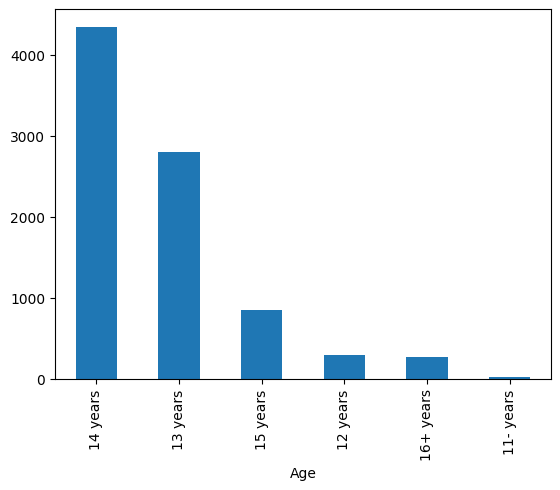

In [21]:
df['Age'].value_counts().plot.bar()

In [22]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8801 entries, 0 to 8800
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
8569 non-null   object
dtypes: object(1)
memory usage: 68.9+ KB


In [25]:
data = df[[
    'Science..',
    'Father.edu',
    'Age'
]]
data = data.pivot_table(index='Father.edu', columns='Age', values='Science..', aggfunc='mean')
data

Age,11- years,12 years,13 years,14 years,15 years,16+ years
Father.edu,,,,,,
Degree & above,NaN,46.752857,44.805143,42.676944,29.090000,32.730000
Illiterate,NaN,29.870000,33.758968,35.319478,33.413333,33.116786
Primary,48.486667,34.121667,37.617555,36.700267,35.162768,32.364000
Secondary,29.696667,33.593810,38.164402,36.738859,32.872800,30.960000
Sr secondary,NaN,40.113750,39.046503,39.050278,38.615714,31.513333


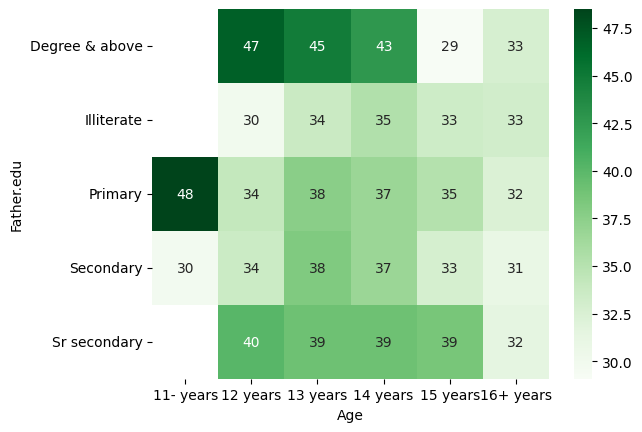

In [26]:
sns.heatmap(data, cmap='Greens', annot=True)
plt.show()

In [36]:
import pandas as pd
cust_rating = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GvOkzy5MLdy9zJ8vXMArwpRvN/rating_final.csv')
cust_rating['avg_rating'] = round(cust_rating[['rating', 'food_rating', 'service_rating']].mean(axis=1))

In [37]:
data = cust_rating.head(10)
data


,userID,placeID,rating,food_rating,service_rating,avg_rating
0,U1077,135085,2,2,2,2.0
1,U1077,135038,2,2,1,2.0
2,U1077,132825,2,2,2,2.0
3,U1077,135060,1,2,2,2.0
4,U1068,135104,1,1,2,1.0
5,U1068,132740,0,0,0,0.0
6,U1068,132663,1,1,1,1.0
7,U1068,132732,0,0,0,0.0
8,U1068,132630,1,1,1,1.0
9,U1067,132584,2,2,2,2.0
